In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

__PART 4 SUPPORT VECTOR MACHINE__

In [16]:
df['term_deposit']. value_counts()

0    34875
1     4607
Name: term_deposit, dtype: int64

In [17]:
df.dtypes

age                    int64
job                   object
marital               object
education             object
default               object
housing               object
loan                  object
contact               object
month                 object
day_of_week           object
campaign               int64
pdays                  int64
previous               int64
poutcome              object
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
term_deposit           int64
Ethnicity_African      int64
dtype: object

In [18]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,term_deposit,Ethnicity_African
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0


In [19]:
df['job'].unique()

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8])

In [20]:
X = df.drop('term_deposit', axis= 1).copy()
y = df['term_deposit'].copy()

In [21]:
X_encoded = pd.get_dummies(X, columns= ['job', 'marital', 
                                        'education', 'default', 
                                        'housing', 'loan', 
                                        'contact', 'month', 
                                        'day_of_week', 'poutcome'])
X_encoded.head()          

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Ethnicity_African,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.30)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [23]:
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

SVC()

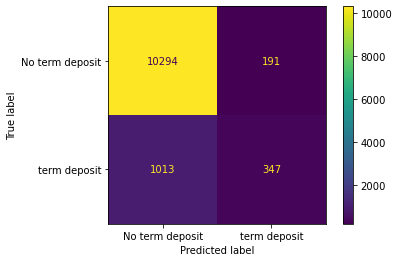

In [24]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format='d', display_labels=["No term deposit", "term deposit"])

In the confusion matrix, of the __10,485__ people that did not sign up for a term deposit, __10,294 (98%)__ were correctly classified. Of the __1,360__ people that signed up for a term deposit, __347 (26%)__ were correctly classified. SVM is very bad at predicting the negative class.

### Optimisation

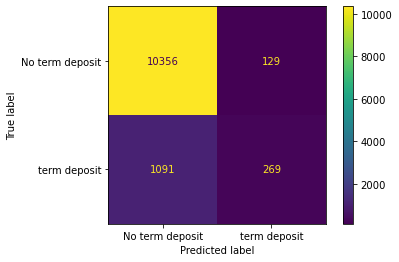

In [25]:
clf_svm = SVC(C=10,gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format='d', display_labels=["No term deposit", "term deposit"])

In the confusion matrix, of the __10,485__ people that did not sign up for a term deposit, __10,356 (99%)__ were correctly classified. Of the __1,360__ people that signed up for a term deposit, __269 (20%)__ were correctly classified. SVM improved at predicting the positve class but got worse at predicting the negative class.

In [26]:
y_pred = clf_svm.predict(X_test_scaled)
score = clf_svm.score(X_test, y_test)
score = score.round(4)

cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=clf_svm.classes_, columns=['Actual No', 'Actual Yes'])
cm_df.index = ['Predicted No', 'Predicted Yes']
print(cm_df)

               Actual No  Actual Yes
Predicted No       10356        1091
Predicted Yes        129         269


In [27]:
f_one_score = f1_score(y_test, y_pred)
f_one_score = f_one_score.round(4)

# Calculate TPR ----> TPR = (TP / TP + FN)
true_pos = cm_df.iloc[1][1]
false_neg = cm_df.iloc[0][1]
tpr = ( true_pos / (true_pos + false_neg) ).round(4)
    
# Calculate FPR ---> FPR = FP / (FP + TN)
false_pos = cm_df.iloc[1][0]
true_neg = cm_df.iloc[0][0]
fpr = (false_pos / (false_pos + true_neg)).round(4)
    
# Calculate Precision ---> Precision = TP / (TP + FP)
precision =( true_pos / (true_pos + false_pos)).round(4)

In [28]:
summary_df = pd.DataFrame(columns = ['Accuracy', 'TPR', 'FPR', 'Precision', 'F Score'])

In [29]:
summary_df.loc[summary_df.shape[0]] = (score, tpr, fpr, precision, f_one_score)

In [30]:
summary_df

,Accuracy,TPR,FPR,Precision,F Score
0,0.8852,0.1978,0.0123,0.6759,0.306


## Downsample + Resample

In [31]:
df_notermdeposit = df[df['term_deposit']==0]
df_termdeposit = df[df['term_deposit']==1]

In [32]:
df_notermdeposit_downsampled = resample(df_notermdeposit, replace= False, n_samples = 4000)
df_termdeposit_downsampled = resample(df_termdeposit, replace= False, n_samples = 4000)
df_downsample = pd.concat([df_notermdeposit_downsampled, df_termdeposit_downsampled])
len(df_downsample)

8000

In [33]:
df_downsample['term_deposit']. value_counts()

0    4000
1    4000
Name: term_deposit, dtype: int64

In [34]:
X = df_downsample.drop('term_deposit', axis= 1).copy()
y = df_downsample['term_deposit'].copy()

In [35]:
X_encoded = pd.get_dummies(X, columns= ['job', 'marital', 
                                        'education', 'default', 
                                        'housing', 'loan', 
                                        'contact', 'month', 
                                        'day_of_week', 'poutcome'])
X_encoded.head() 

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Ethnicity_African,...,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
34787,33,7,999,0,-1.8,92.893,-46.2,1.266,5099.1,0,...,0,0,0,0,1,0,0,0,1,0
9156,31,2,999,0,1.4,94.465,-41.8,4.967,5228.1,0,...,0,0,1,0,0,0,0,0,1,0
2673,47,3,999,0,1.1,93.994,-36.4,4.859,5191.0,0,...,0,0,0,0,0,0,1,0,1,0
23528,34,2,999,0,1.4,93.444,-36.1,4.962,5228.1,0,...,0,0,0,0,1,0,0,0,1,0
16845,52,1,999,0,1.4,93.918,-42.7,4.962,5228.1,0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.30)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [37]:
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train)

SVC()

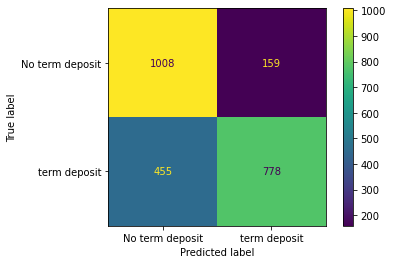

In [38]:
plot_confusion_matrix(clf_svm, X_test_scaled,
                     y_test, values_format='d',
                     display_labels=["No term deposit", "term deposit"])

In the confusion matrix, of the __1,167__ people that did not sign up for a term deposit, __1,008 (86%)__ were correctly classified. Of the __1,233__ people that signed up for a term deposit, __778 (63%)__ were correctly classified. SVM was ok

### Optimisatiom with CV

In [39]:
param_grid = [{'C': [0.5, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}]

optimal_params = GridSearchCV(SVC(), param_grid, cv=10,
                             scoring = 'accuracy', verbose=0)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [40]:
clf_svm = SVC(C=1,gamma=0.01)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.01)

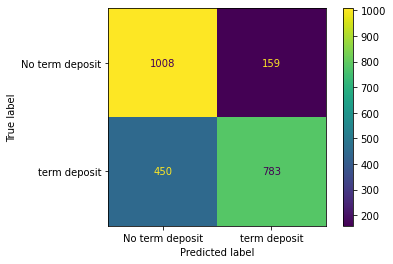

In [41]:
plot_confusion_matrix(clf_svm, X_test_scaled,
                     y_test, values_format='d',
                     display_labels=["No term deposit", "term deposit"])

In the confusion matrix, of the __1,167__ people that did not sign up for a term deposit, __1,008 (86%)__ were correctly classified. Of the __1,233__ people that signed up for a term deposit, __783 (64%)__ were correctly classified. SVM saw no change in predicting the positve class but got slightly better at predicting the negative class.

In [42]:
y_pred = clf_svm.predict(X_test_scaled)
score = clf_svm.score(X_test, y_test)
score = score.round(4)

cm_df2 = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=clf_svm.classes_, columns=['Actual No', 'Actual Yes'])
cm_df2.index = ['Predicted No', 'Predicted Yes']
print(cm_df2)

               Actual No  Actual Yes
Predicted No        1008         450
Predicted Yes        159         783


In [43]:
f_one_score = f1_score(y_test, y_pred)
f_one_score = f_one_score.round(4)

# Calculate TPR ----> TPR = (TP / TP + FN)
true_pos = cm_df2.iloc[1][1]
false_neg = cm_df2.iloc[0][1]
tpr = ( true_pos / (true_pos + false_neg) ).round(4)
    
# Calculate FPR ---> FPR = FP / (FP + TN)
false_pos = cm_df2.iloc[1][0]
true_neg = cm_df2.iloc[0][0]
fpr = (false_pos / (false_pos + true_neg)).round(4)
    
# Calculate Precision ---> Precision = TP / (TP + FP)
precision =( true_pos / (true_pos + false_pos)).round(4)

In [44]:
summary_df.loc[summary_df.shape[1]] = (score, tpr, fpr, precision, f_one_score)

In [45]:
summary_df.insert(0, "SVM", ['All Data', 'Resampled'], True)
summary_df.set_index('SVM', inplace=True)

In [46]:
summary_df

,Accuracy,TPR,FPR,Precision,F Score
SVM,,,,,
All Data,0.8852,0.1978,0.0123,0.6759,0.306
Resampled,0.5138,0.6350,0.1362,0.8312,0.720


In [47]:
import dataframe_image as dfi
dfi.export(summary_df, 'SVM Summary Table')

## PCA

In [48]:
len(df_downsample.columns)

21

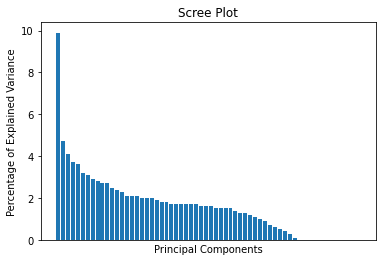

In [49]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [50]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords,train_pc2_coords)))

param_grid = [
    {'C': [1, 10, 100, 1000],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0 )

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


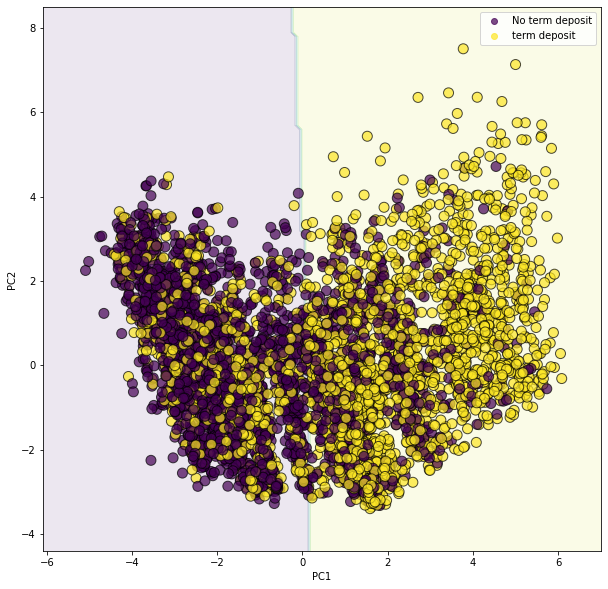

In [54]:
clf_svm = SVC(C=1 , gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)

test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() -1
y_max = test_pc2_coords.max() +1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1), 
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx, yy, Z, alpha=0.1)

cmap = colors.ListedColormap(['#e41alc', '#4daf4a'])

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train,
                    s=100,
                    edgecolors='k',
                    alpha=0.7)
legend = ax.legend(scatter.legend_elements()[0],
                    scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No term deposit")
legend.get_texts()[1].set_text("term deposit")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using PCA transformed / projected features')
plt.show()